In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import collections

df = pd.read_csv('creditcard.csv')

In [2]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


In [3]:
df.info()
df.shape
fraudCount = df['Class'].value_counts()
print(fraudCount)
#Obtaining some info about the table, 1 row is malformed
#ratio of fraud:not is 211:90988
#average values of each class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#clean data, split it into legit and fraud according to already classed figures
df = df.dropna()
print(df.shape)
fraudCount = df['Class'].value_counts()
print(fraudCount)
#dataset of legit transactions
dfLegit = df[df['Class'] == 0]
print(dfLegit.shape)
#dataset of fraudulent transactions
dfFraud = df[df['Class'] == 1]
print(dfFraud.shape)

(284807, 31)
0    284315
1       492
Name: Class, dtype: int64
(284315, 31)
(492, 31)


(492, 28)
(452, 28)
Number of outliers: 40


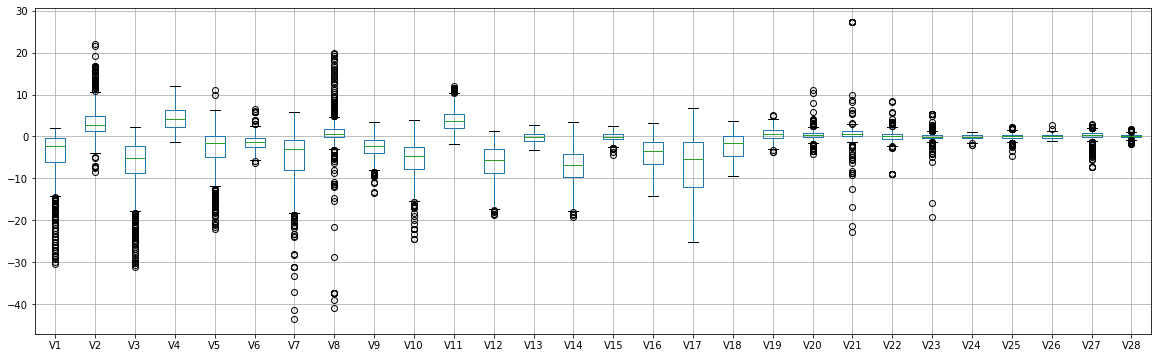

In [5]:
########## FRAUDULENT TRANSACTIONS ###########
#Obtain standard information about the columns before processing
dfFraud2 = dfFraud.drop(['Class'],axis=1)
dfFraud2 = dfFraud2.drop(['Time'],axis=1)
dfFraud2 = dfFraud2.drop(['Amount'],axis=1)
dfFraud2.boxplot(figsize=(20,6))

#Number of outliers - potential legit transactions
Zfraud = (dfFraud2-dfFraud2.mean())/dfFraud2.std()
print(Zfraud.shape)
Z2fraud = Zfraud.loc[((Zfraud > -3).sum(axis=1)==28) & ((Zfraud <= 3).sum(axis=1)==28),:]
print(Z2fraud.shape)
print("Number of outliers:",Zfraud.shape[0]-Z2fraud.shape[0])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
V1,1.000000,-0.819226,0.907875,-0.562688,0.894968,0.223961,0.897609,-0.065787,0.631848,0.710112,...,-0.257132,-0.296280,0.083158,-0.043392,-0.064715,-0.195991,-0.090328,0.133522,0.271335,0.284370
V2,-0.819226,1.000000,-0.876904,0.629688,-0.828391,-0.133373,-0.862983,-0.059535,-0.684573,-0.741085,...,0.129530,0.317072,-0.025126,-0.013726,0.199605,0.079638,0.139412,-0.054150,-0.254623,-0.056688
V3,0.907875,-0.876904,1.000000,-0.723766,0.883689,0.383930,0.882312,-0.174837,0.733208,0.818243,...,-0.245012,-0.355431,0.127262,-0.082243,-0.053028,-0.075581,-0.102828,0.033203,0.193183,0.247184
V4,-0.562688,0.629688,-0.723766,1.000000,-0.550242,-0.310530,-0.678238,0.099480,-0.818853,-0.726971,...,0.232063,0.306800,-0.179687,0.196026,0.056657,-0.026260,-0.086619,0.236842,-0.114434,-0.232332
V5,0.894968,-0.828391,0.883689,-0.550242,1.000000,0.198775,0.839738,-0.207546,0.658322,0.764589,...,-0.393706,-0.314408,0.103431,-0.112837,-0.107258,-0.290589,-0.098699,0.129076,0.249589,0.251549
V6,0.223961,-0.133373,0.383930,-0.310530,0.198775,1.000000,0.151266,-0.743021,0.256004,0.301981,...,-0.181759,-0.068540,0.096851,0.004450,0.441265,-0.126380,-0.190253,-0.032648,-0.178559,-0.000370
V7,0.897609,-0.862983,0.882312,-0.678238,0.839738,0.151266,1.000000,0.133989,0.754725,0.859823,...,-0.302068,-0.391629,0.118698,-0.146239,-0.119346,-0.156862,0.089469,0.084987,0.326955,0.245928
V8,-0.065787,-0.059535,-0.174837,0.099480,-0.207546,-0.743021,0.133989,1.000000,-0.058956,-0.021787,...,0.238125,-0.051522,-0.124901,0.038024,-0.449208,0.125535,0.278903,0.063219,0.298508,-0.020636
V9,0.631848,-0.684573,0.733208,-0.818853,0.658322,0.256004,0.754725,-0.058956,1.000000,0.863966,...,-0.282247,-0.437320,0.309410,-0.345583,-0.088287,-0.078098,0.012611,-0.177040,0.236227,0.275593
V10,0.710112,-0.741085,0.818243,-0.726971,0.764589,0.301981,0.859823,-0.021787,0.863966,1.000000,...,-0.379002,-0.406363,0.219402,-0.301064,-0.086715,-0.114531,0.063821,0.002612,0.275581,0.275053


<AxesSubplot:>

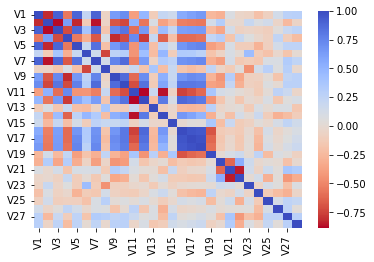

In [6]:
#### FRAUD #####
################ Show univariate summaries ##############

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
display(dfFraud2.describe())
display(dfFraud2.corr())

sns.heatmap(dfFraud2.corr(), cmap='coolwarm_r', annot_kws={'size':20})

(284315, 28)
(245304, 28)
Number of outliers: 39011


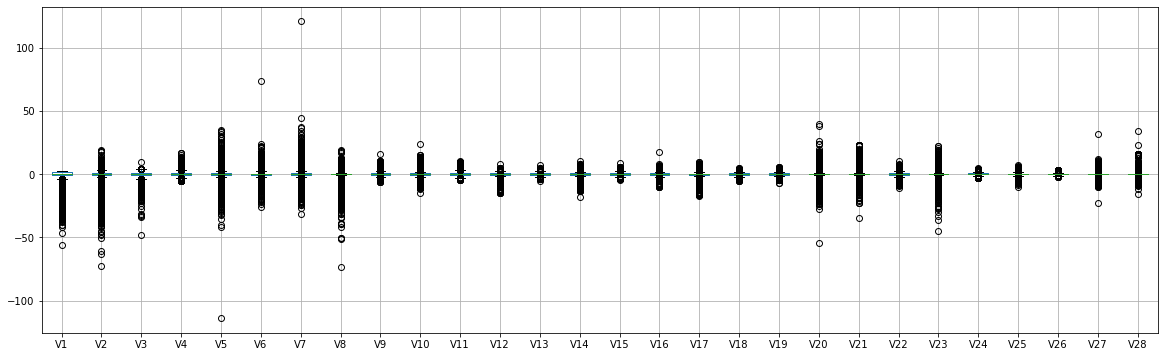

In [7]:
##### LEGIT TRANSACTIONS ######
#Boxplot to identify outliers for those classed as legit
dfLegit2 = dfLegit.drop(['Class'],axis=1)
dfLegit2 = dfLegit2.drop(['Time'],axis=1)
dfLegit2 = dfLegit2.drop(['Amount'],axis=1)
dfLegit2.boxplot(figsize=(20,6))

#Number of outliers - potential fraudulent transactions
Zlegit = (dfLegit2-dfLegit2.mean())/dfLegit2.std()
print(Zlegit.shape)
Z2legit = Zlegit.loc[((Zlegit > -3).sum(axis=1)==28) & ((Zlegit <= 3).sum(axis=1)==28),:]
print(Z2legit.shape)
print("Number of outliers:",Zlegit.shape[0]-Z2legit.shape[0])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000
mean,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131
std,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,...,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,...,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950
50%,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,...,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199
75%,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,...,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
V1,1.000000,0.022537,-0.047511,0.020927,-0.031465,-0.006405,-5.356252e-02,0.004444,-0.018962,-0.043521,...,0.006555,0.005222,0.001542,0.000627,0.000720,0.000269,0.001181,-3.337293e-04,-0.003843,-0.001883
V2,0.022537,1.000000,0.037855,-0.018318,0.023772,0.004879,4.203396e-02,-0.000308,0.016215,0.036616,...,-0.004332,-0.004371,-0.003208,0.000054,-0.002049,0.000359,-0.001272,-1.713001e-04,0.002333,-0.000455
V3,-0.047511,0.037855,1.000000,0.039621,-0.048840,-0.013294,-8.485279e-02,0.012717,-0.033957,-0.077708,...,0.010916,0.009277,0.002536,0.001591,0.000592,-0.000909,0.001990,6.214473e-04,-0.002033,-0.001536
V4,0.020927,-0.018318,0.039621,1.000000,0.020792,0.007452,4.128382e-02,-0.004830,0.019998,0.042680,...,-0.006279,-0.004627,-0.002162,-0.001545,-0.000146,0.001056,0.000022,-1.424070e-03,-0.001003,0.000076
V5,-0.031465,0.023772,-0.048840,0.020792,1.000000,-0.006130,-5.411916e-02,0.010285,-0.019872,-0.046404,...,0.008482,0.005711,0.000190,0.001672,0.001603,0.000992,0.001354,-4.320713e-04,-0.004159,-0.001932
V6,-0.006405,0.004879,-0.013294,0.007452,-0.006130,1.000000,-1.083798e-02,0.011390,-0.005735,-0.013322,...,0.002360,0.001171,0.000552,0.000013,-0.002824,-0.000057,0.000848,2.721747e-04,0.002261,0.000420
V7,-0.053563,0.042034,-0.084853,0.041284,-0.054119,-0.010838,1.000000e+00,-0.004257,-0.037696,-0.087096,...,0.012917,0.011200,0.001388,0.003348,0.002671,-0.000012,-0.000794,-5.954729e-07,-0.008393,-0.002432
V8,0.004444,-0.000308,0.012717,-0.004830,0.010285,0.011390,-4.257049e-03,1.000000,0.003386,0.005664,...,-0.005281,0.000499,0.005968,-0.000810,0.011596,-0.000932,-0.004385,-7.163256e-04,-0.010754,0.000151
V9,-0.018962,0.016215,-0.033957,0.019998,-0.019872,-0.005735,-3.769580e-02,0.003386,1.000000,-0.038394,...,0.005567,0.005022,-0.002533,0.002909,0.000623,-0.000449,0.000250,1.126413e-03,-0.001473,-0.000871
V10,-0.043521,0.036616,-0.077708,0.042680,-0.046404,-0.013322,-8.709577e-02,0.005664,-0.038394,1.000000,...,0.013726,0.010321,-0.000211,0.005219,0.001174,-0.000846,-0.000041,9.886339e-04,-0.003665,-0.001536


<AxesSubplot:>

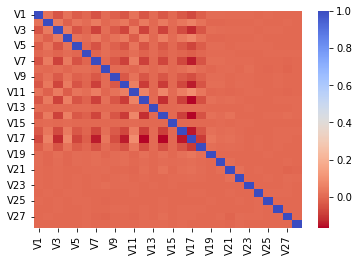

In [8]:
#Show univariate summaries for legit data

display(dfLegit2.describe())
display(dfLegit2.corr())
sns.heatmap(dfLegit2.corr(), cmap='coolwarm_r', annot_kws={'size':20})
#Correlation is a large factor for fraudulent transactions, main way of identifying

In [9]:
#Display the mean of each columns from legit and fraudulent transactions
#Display the difference between them. The most significant difference is used
#as the main identifier

dfLegit2 = dfLegit.drop(['Class'],axis=1)
dfFraud2 = dfFraud.drop(['Class'],axis=1)

legitMean = dfLegit2.mean()
fraudMean = dfFraud2.mean()
l_series = pd.Series(legitMean, name="legit")
f_series = pd.Series(fraudMean, name="fraud")
completeMean = pd.concat([l_series, f_series], axis=1)

"""scaleArray = []
for i in range(len(completeMean['legit'])):
    x = completeMean['legit'][i]
    y = completeMean['fraud'][i]
    scaleArray.append(y/x)
    
completeMean['scale factor'] = scaleArray"""
display(completeMean)

#Time & amount surprisingly aren't as significant in this case, although these could have
#been used as pca components in combination with other metrics. By itself they don't hold
#much weight

,legit,fraud
Time,94838.202258,80746.806911
V1,0.008258,-4.771948
V2,-0.006271,3.623778
V3,0.012171,-7.033281
V4,-0.007860,4.542029
V5,0.005453,-3.151225
V6,0.002419,-1.397737
V7,0.009637,-5.568731
V8,-0.000987,0.570636
V9,0.004467,-2.581123


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
#drop cateogrical column and standardise the rest

x = df.loc[:, df.columns].values
x = StandardScaler().fit_transform(x)
sdf = pd.DataFrame(x,columns=df.columns)
#assign categorocal column back to the standardised table
sdf['Class'] = df['Class']
display(sdf)
"""
#create scatter plot with labels via TSNE for dimensionality reduction
embedding = TSNE(n_components=2, perplexity=100)

Xp = embedding.fit_transform(sdf)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'Class': df['Class']})

sns.scatterplot(x='x', y='y', hue='target', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print("success")
"""

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


'\n#create scatter plot with labels via TSNE for dimensionality reduction\nembedding = TSNE(n_components=2, perplexity=100)\n\nXp = embedding.fit_transform(sdf)\ndf_projection = pd.DataFrame({\'x\': Xp[:, 0], \'y\': Xp[:, 1],\n                              \'Class\': df[\'Class\']})\n\nsns.scatterplot(x=\'x\', y=\'y\', hue=\'target\', data=df_projection)\n\nplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)\nplt.show()\nprint("success")\n'

In [11]:
######## OVERSAMPLING OF DATASET ############
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

#Original Sample
oversampleDF = df.copy()
X = oversampleDF.drop(columns = ['Class'], axis=1)
y = oversampleDF['Class']
sample_size = 15000
X = X[:sample_size]
y = y[:sample_size]

#Alternate Sample using the entire fraudulent class
XL = dfLegit.sample(n=15000, random_state=1)

X2 = pd.concat([dfFraud, XL])
y2 = X2['Class']
X2 = X2.drop(columns = ['Class'], axis=1)

#Spit data
##########################################################################################################
##########################################################################################################
####************ TO CHANGE THE DATASETS, CHANGE X2 & y2 to X & y RESPECTELY OR VICE VERSA ************####
################************************ IN THE LINE BELOW *******************************################
##########################################################################################################
##########################################################################################################
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

print("Before oversampling test data:\n",y_test.value_counts())
print("\nAfter oversampling test data:\n", y_test_smote.value_counts())

print("\nBefore oversampling training data:\n", y_train.value_counts())
print("\nAfter oversampling training data:\n", y_train_smote.value_counts())

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_smote, y_train_smote)
print('Test dataset accuracy (Original)    : {0}.'.format(knn.score(X_test, y_test)))
print('Test dataset accuracy (Oversampled) : {0}.'.format(knn.score(X_test_smote, y_test_smote)))

Before oversampling test data:
 0    2995
1     104
Name: Class, dtype: int64

After oversampling test data:
 0    2995
1    2995
Name: Class, dtype: int64

Before oversampling training data:
 0    12005
1      388
Name: Class, dtype: int64

After oversampling training data:
 0    12005
1    12005
Name: Class, dtype: int64
Test dataset accuracy (Original)    : 0.8538238141335914.
Test dataset accuracy (Oversampled) : 0.6819699499165276.


In [12]:
org_series = pd.Series(X_train.mean(), name="Original")
smote_series = pd.Series(X_train_smote.mean(), name="Oversampled")
smoteMean = pd.concat([org_series, smote_series], axis=1)

display(smoteMean)

,Original,Oversampled
Time,94701.294602,87422.877664
V1,-0.166577,-2.507477
V2,0.112139,1.958087
V3,-0.216436,-3.670905
V4,0.146640,2.354555
V5,-0.098408,-1.669448
V6,-0.053504,-0.734482
V7,-0.158453,-2.903487
V8,0.009069,0.308224
V9,-0.073174,-1.324542


In [13]:
import numpy as np

y_pred = knn.predict(X_test_smote)
mistakes = 0

for i in range(len(y_pred)):
    if y_pred[i] != y_test_smote.values[i]:
        mistakes += 1

print("Erros with prediction: ", mistakes, " out of ",len(y_pred), " total records")

Erros with prediction:  1905  out of  5990  total records


In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [1, 3, 5]}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train_smote, y_train_smote)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_test, y_test)))

Best hyperparameter setting: KNeighborsClassifier(n_neighbors=1).
Average accuracy across folds of best hyperparameter setting: 0.8668887963348604.
Test dataset accuracy of best hyperparameter setting: 0.8538238141335914.


accuracy: 0.6820, precision: 0.7844, recall: 0.5018,F1: 0.6121


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

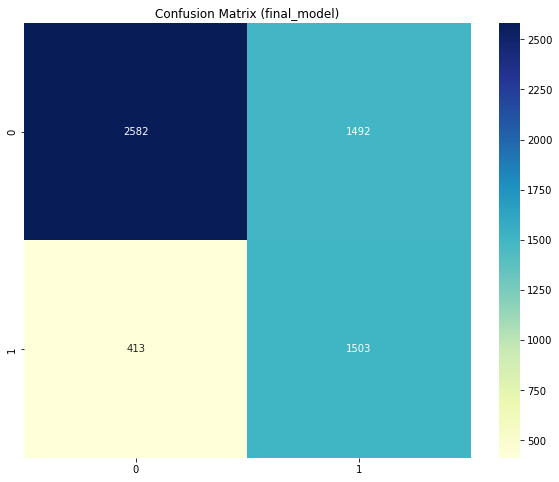

In [15]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

final_model_result = confusion_matrix(y_pred, y_test_smote)
accuracy = accuracy_score(y_test_smote , y_pred)
precision = precision_score(y_test_smote , y_pred)
recall = recall_score(y_test_smote , y_pred)
f1 = f1_score(y_test_smote , y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

In [16]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(y_pred)):
    if (y_pred[i]==0) & (y_test_smote.values[i]==0):
        TN += 1
    if (y_pred[i]==0) & (y_test_smote.values[i]==1):
        FN += 1
    if (y_pred[i]==1) & (y_test_smote.values[i]==1):
        TP += 1
    if (y_pred[i]==1) & (y_test_smote.values[i]==0):
        FP += 1

print("True Positives: ", TP)
print("False Positives: ", FP)
print("True Negatives: ", TN)
print("False Negatives: ", FN)

print(precision_score(y_test_smote , y_pred))
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Precision = TruePositives / (TruePositives + FalsePositives)

True Positives:  1503
False Positives:  413
True Negatives:  2582
False Negatives:  1492
0.784446764091858


accuracy: 0.8538, precision: 0.1342, recall: 0.6154,F1: 0.2203


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

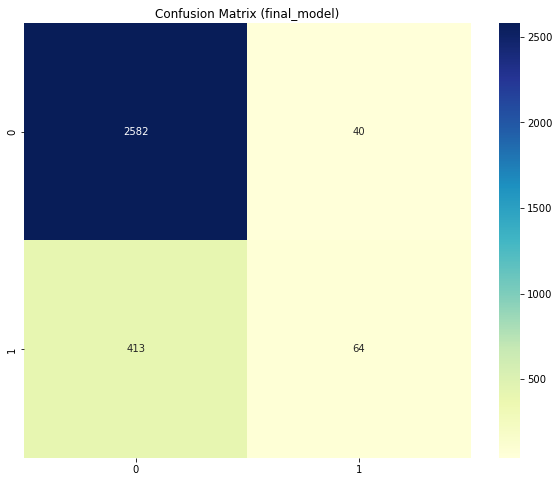

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_smote, y_train_smote)
y2_pred = knn.predict(X_test)

final_model_result = confusion_matrix(y2_pred, y_test)
accuracy = accuracy_score(y_test, y2_pred)
precision = precision_score(y_test, y2_pred)
recall = recall_score(y_test, y2_pred)
f1 = f1_score(y_test, y2_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

In [18]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(y2_pred)):
    if (y2_pred[i]==0) & (y_test.values[i]==0):
        TN += 1
    if (y2_pred[i]==0) & (y_test.values[i]==1):
        FN += 1
    if (y2_pred[i]==1) & (y_test.values[i]==1):
        TP += 1
    if (y2_pred[i]==1) & (y_test.values[i]==0):
        FP += 1

print("True Positives: ", TP)
print("False Positives: ", FP)
print("True Negatives: ", TN)
print("False Negatives: ", FN)

print(precision_score(y_test , y2_pred))
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Precision = TruePositives / (TruePositives + FalsePositives)

True Positives:  64
False Positives:  413
True Negatives:  2582
False Negatives:  40
0.13417190775681342


In [46]:
##########################################################
################### Random Forest ########################
##########################################################

In [47]:
parameters = {'n_estimators': [50, 100, 150, 200, 250]}

rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, parameters, cv=5)
rfc_cv.fit(X_train_smote, y_train_smote)

print('Best hyperparameter setting: {0}.'.format(rfc_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(rfc_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(rfc_cv.score(X_test, y_test)))

Best hyperparameter setting: RandomForestClassifier(n_estimators=250).
Average accuracy across folds of best hyperparameter setting: 0.9970012494793836.
Test dataset accuracy of best hyperparameter setting: 0.9935463052597612.


In [48]:
rfc = RandomForestClassifier(n_estimators = 150, random_state=0)
rfc.fit(X_train_smote, y_train_smote)
print('Test dataset accuracy (random forest classifier): {0}.'.format(rfc.score(X_test, y_test)))

Test dataset accuracy (random forest classifier): 0.9925782510487254.


accuracy: 0.9651, precision: 0.9982, recall: 0.9319,F1: 0.9639


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

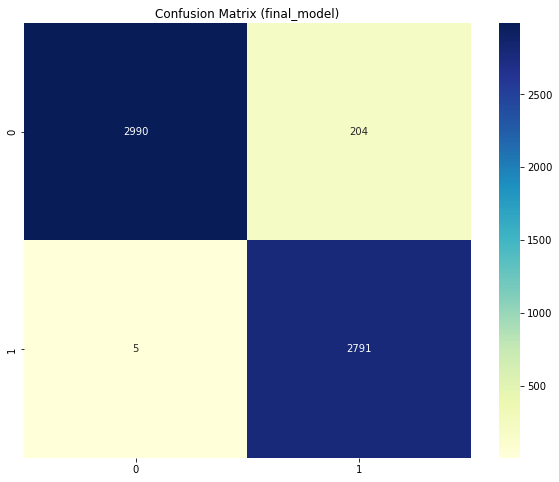

In [49]:
y_pred = rfc.predict(X_test_smote)

final_model_result = confusion_matrix(y_pred, y_test_smote)
accuracy = accuracy_score(y_test_smote , y_pred)
precision = precision_score(y_test_smote , y_pred)
recall = recall_score(y_test_smote , y_pred)
f1 = f1_score(y_test_smote , y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

accuracy: 0.9926, precision: 0.9451, recall: 0.8269,F1: 0.8821


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

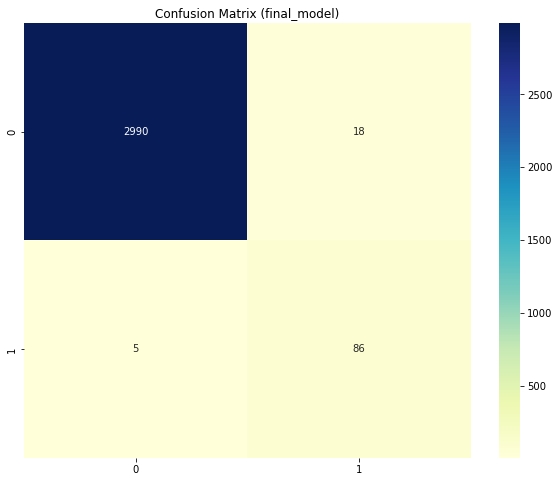

In [50]:
y_pred = rfc.predict(X_test)

final_model_result = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

In [51]:
##########################################################
######################## SVC #############################
##########################################################

In [52]:
"""
from sklearn.model_selection import GridSearchCV

svm = SVC()
#svm.fit(X_train_smote, y_train_smote)

parameters = {'kernel': ['linear', 'rbf', 'poly']}
#, 'gamma': [0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100, 1000]

svm_cv = GridSearchCV(svm, parameters, cv=5)
svm_cv.fit(X_train_smote, y_train_smote)

print('Best hyperparameter setting: {0}.'.format(svm_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(svm_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(svm_cv.score(X_test_smote, y_test_smote)))
"""
# Left running for 15 hours and no output. Unviable to check the different parameters

"\nfrom sklearn.model_selection import GridSearchCV\n\nsvm = SVC()\n#svm.fit(X_train_smote, y_train_smote)\n\nparameters = {'kernel': ['linear', 'rbf', 'poly']}\n#, 'gamma': [0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100, 1000]\n\nsvm_cv = GridSearchCV(svm, parameters, cv=5)\nsvm_cv.fit(X_train_smote, y_train_smote)\n\nprint('Best hyperparameter setting: {0}.'.format(svm_cv.best_estimator_))\nprint('Average accuracy across folds of best hyperparameter setting: {0}.'.format(svm_cv.best_score_))\nprint('Test dataset accuracy of best hyperparameter setting: {0}.'.format(svm_cv.score(X_test_smote, y_test_smote)))\n"

In [53]:
svm = SVC()
svm.fit(X_train_smote, y_train_smote)
print('Test dataset accuracy (SVM): {0}.'.format(svm.score(X_test_smote, y_test_smote)))

Test dataset accuracy (SVM): 0.5385642737896494.


accuracy: 0.5386, precision: 0.5533, recall: 0.4003,F1: 0.4645


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

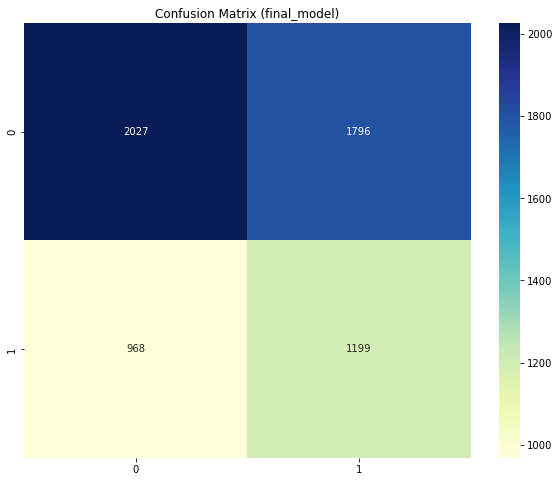

In [54]:
y_pred = svm.predict(X_test_smote)

final_model_result = confusion_matrix(y_pred, y_test_smote)
accuracy = accuracy_score(y_test_smote , y_pred)
precision = precision_score(y_test_smote , y_pred)
recall = recall_score(y_test_smote , y_pred)
f1 = f1_score(y_test_smote , y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

accuracy: 0.6676, precision: 0.0416, recall: 0.4038,F1: 0.0754


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

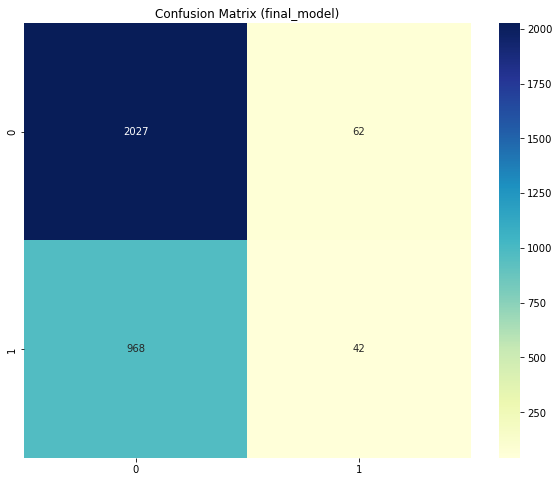

In [55]:
y_pred = svm.predict(X_test)

final_model_result = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

In [56]:
##########################################################
############### Decision Tree Classifier #################
##########################################################

In [57]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_smote, y_train_smote)
print('Test dataset accuracy (Decision Tree): {0}.'.format(dtc.score(X_test_smote, y_test_smote)))

Test dataset accuracy (Decision Tree): 0.9537562604340568.


accuracy: 0.9538, precision: 0.9806, recall: 0.9259,F1: 0.9524


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

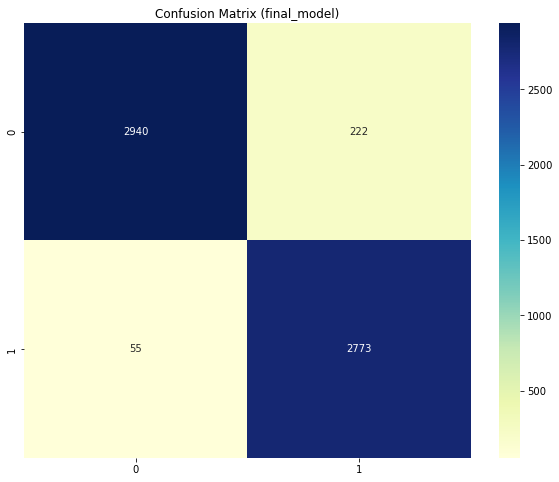

In [58]:
y_pred = dtc.predict(X_test_smote)

final_model_result = confusion_matrix(y_pred, y_test_smote)
accuracy = accuracy_score(y_test_smote , y_pred)
precision = precision_score(y_test_smote , y_pred)
recall = recall_score(y_test_smote , y_pred)
f1 = f1_score(y_test_smote , y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

accuracy: 0.9774, precision: 0.6181, recall: 0.8558,F1: 0.7177


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

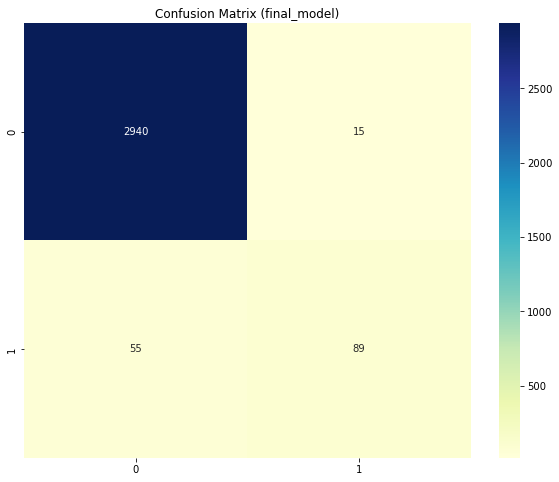

In [59]:
y_pred = dtc.predict(X_test)

final_model_result = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

In [60]:
##########################################################
################## Logistic Regression ###################
##########################################################

In [61]:
lr = LogisticRegression(max_iter=400, random_state=0)
lr.fit(X_train_smote, y_train_smote)
print('Test dataset accuracy (Logistic Regression): {0}.'.format(lr.score(X_test_smote, y_test_smote)))

Test dataset accuracy (Logistic Regression): 0.9669449081803005.


accuracy: 0.9669, precision: 0.9841, recall: 0.9492,F1: 0.9663


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

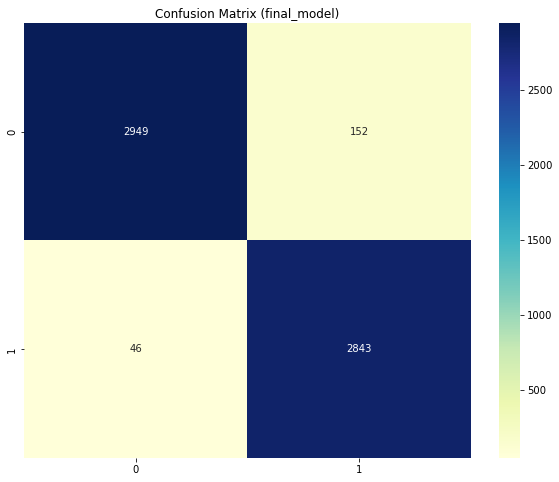

In [62]:
y_pred = lr.predict(X_test_smote)

final_model_result = confusion_matrix(y_pred, y_test_smote)
accuracy = accuracy_score(y_test_smote , y_pred)
precision = precision_score(y_test_smote , y_pred)
recall = recall_score(y_test_smote , y_pred)
f1 = f1_score(y_test_smote , y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

accuracy: 0.9800, precision: 0.6567, recall: 0.8462,F1: 0.7395


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

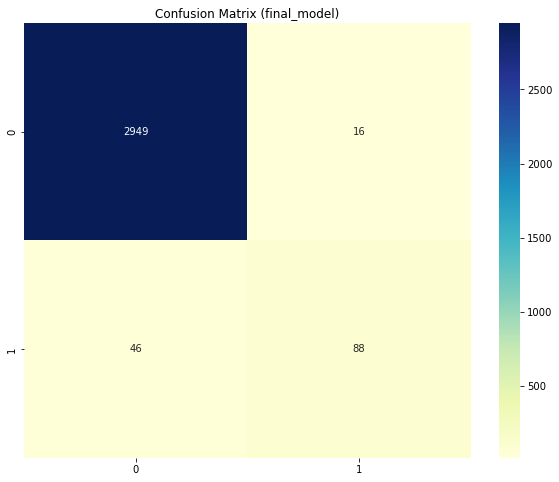

In [63]:
y_pred = lr.predict(X_test)

final_model_result = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')